In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import missingno as msno

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, KFold
from xgboost import XGBClassifier
from yellowbrick.classifier import confusion_matrix


In [ ]:
# Load the raw dataset
heart_disease_data_raw = pd.read_csv("/content/heart_disease_data.csv")
print(heart_disease_data_raw.shape)
heart_disease_data_raw.head().T

(42640, 29)


,0,1,2,3,4
Year,2006,2005,2007,2008,2004
LocationAbbr,US,US,US,US,US
LocationDesc,United States,United States,United States,United States,United States
DataSource,Medicare,Medicare,Medicare,Medicare,Medicare
PriorityArea1,None,None,None,None,None
PriorityArea2,None,None,None,None,None
PriorityArea3,None,None,None,None,None
PriorityArea4,None,None,None,None,None
Category,Cardiovascular Diseases,Cardiovascular Diseases,Cardiovascular Diseases,Cardiovascular Diseases,Cardiovascular Diseases
Topic,Heart Failure,Heart Failure,Coronary Heart Disease,Coronary Heart Disease,Heart Failure


In [ ]:

# View descriptive statistics of raw dataset
heart_disease_data_raw.describe(include='all').T

# Drop unnecessary columns from the raw dataset
heart_disease_data = heart_disease_data_raw.drop(['DataSource', 'PriorityArea2', 'PriorityArea4', 'Category',
                                                  'Data_Value_Type', 'Data_Value_Footnote_Symbol', 'Data_Value_Footnote',
                                                  'CategoryId', 'Data_Value_TypeID'], axis=1)
print(heart_disease_data.shape)
heart_disease_data.describe(include="all")


(42640, 20)


,Year,LocationAbbr,LocationDesc,PriorityArea1,PriorityArea3,Topic,Indicator,Data_Value_Unit,Data_Value,Data_Value_Alt,LowConfidenceLimit,HighConfidenceLimit,Break_Out_Category,Break_Out,TopicId,IndicatorID,BreakOutCategoryId,BreakOutId,LocationID,GeoLocation
count,42640.000000,42640,42640,42640,42640,42640,42640,42640,42111.000000,42640.000000,42111.000000,42111.000000,42640,42640,42640,42640,42640,42640,42640.000000,41820
unique,NaN,52,52,2,2,6,10,2,NaN,NaN,NaN,NaN,4,9,6,10,4,9,NaN,51
top,NaN,US,United States,None,None,Heart Failure,Prevalence of heart failure hospitalizations a...,Percent (%),NaN,NaN,NaN,NaN,Race,Other,T5,MD501,BOC04,RAC07,NaN,"(42.82700103200045, -75.54397042699964)"
freq,NaN,820,820,33280,28080,19240,4680,28080,NaN,NaN,NaN,NaN,20800,5200,19240,4680,20800,5200,NaN,820
mean,2008.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.780896,14.572709,12.661509,17.074028,NaN,NaN,NaN,NaN,NaN,NaN,29.538462,NaN
std,2.872315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.286487,13.333826,11.453615,17.910274,NaN,NaN,NaN,NaN,NaN,NaN,16.064317,NaN
min,2004.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.400000,-2.000000,0.000000,1.100000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
25%,2006.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.500000,4.400000,3.800000,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,16.750000,NaN
50%,2008.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.700000,10.400000,8.200000,12.700000,NaN,NaN,NaN,NaN,NaN,NaN,29.500000,NaN
75%,2011.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.600000,21.500000,19.600000,23.400000,NaN,NaN,NaN,NaN,NaN,NaN,42.500000,NaN


In [ ]:

# Compare 'Topic' and 'TopicId' columns and drop 'TopicId'
to_compare_5 = pd.DataFrame({'Topic': heart_disease_data.Topic,
                             'TopicId': heart_disease_data.TopicId})
to_compare_5.value_counts()

heart_disease_data = heart_disease_data.drop(['TopicId'], axis=1)
heart_disease_data.shape

# Compare 'Break_Out' and 'BreakOutId' columns and drop 'BreakOutId'
to_compare_4 = pd.DataFrame({'Break_Out': heart_disease_data.Break_Out,
                             'BreakOutId': heart_disease_data.BreakOutId})
to_compare_4.value_counts()

heart_disease_data = heart_disease_data.drop(['BreakOutId'], axis=1)
heart_disease_data.shape

# Compare 'Break_Out_Category' and 'BreakOutCategoryId' columns and drop 'BreakOutCategoryId'
to_compare_3 = pd.DataFrame({'Break_Out_Category': heart_disease_data.Break_Out_Category,
                             'BreakOutCategoryId': heart_disease_data.BreakOutCategoryId})
to_compare_3.value_counts()

heart_disease_data = heart_disease_data.drop(['BreakOutCategoryId'], axis=1)
heart_disease_data.shape

# Compare 'LocationAbbr' and 'LocationDesc' columns and drop 'LocationDesc'
to_compare_1 = pd.DataFrame({'LocationAbbr': heart_disease_data.LocationAbbr,
                             'LocationDesc': heart_disease_data.LocationDesc})
to_compare_1.value_counts()

heart_disease_data = heart_disease_data.drop(['LocationDesc'], axis=1)
heart_disease_data.shape

# Compare 'PriorityArea1', 'PriorityArea3', and 'Data_Value_Unit' columns
to_compare_2 = pd.DataFrame({'PriorityArea1': heart_disease_data.PriorityArea1,
                             'PriorityArea3': heart_disease_data.PriorityArea3,
                             'Data_Value_Unit': heart_disease_data.Data_Value_Unit})
to_compare_2.value_counts()


PriorityArea1   PriorityArea3        Data_Value_Unit
None            None                 Percent (%)        18720
                Healthy People 2020  Rate per 1,000     14560
Million Hearts  None                 Percent (%)         9360
dtype: int64

In [ ]:

# Filter data by 'Healthy People 2020' in 'PriorityArea3'
heart_disease_data_HP2020 = heart_disease_data[(heart_disease_data['PriorityArea3'] == 'Healthy People 2020')]
print(heart_disease_data_HP2020.shape)
heart_disease_data_HP2020.head()


(14560, 16)


,Year,LocationAbbr,PriorityArea1,PriorityArea3,Topic,Indicator,Data_Value_Unit,Data_Value,Data_Value_Alt,LowConfidenceLimit,HighConfidenceLimit,Break_Out_Category,Break_Out,IndicatorID,LocationID,GeoLocation
20094,2004,VA,None,Healthy People 2020,Heart Failure,Rate of hospitalizations among older adults wi...,"Rate per 1,000",13.5,13.5,11.7,15.3,Race,Other,MDP001,51,"(37.54268067400045, -78.45789046299967)"
20095,2005,TX,None,Healthy People 2020,Heart Failure,Rate of hospitalizations among older adults wi...,"Rate per 1,000",23.9,23.9,23.5,24.2,Gender,Male,MDP001,48,"(31.827240407000488, -99.42677020599967)"
20096,2004,CT,None,Healthy People 2020,Heart Failure,Rate of hospitalizations among older adults wi...,"Rate per 1,000",20.1,20.1,19.7,20.5,Race,Non-Hispanic White,MDP001,9,"(41.56266102000046, -72.64984095199964)"
20097,2005,NY,None,Healthy People 2020,Heart Failure,Rate of hospitalizations among older adults wi...,"Rate per 1,000",21.6,21.6,21.3,21.9,Gender,Female,MDP001,36,"(42.82700103200045, -75.54397042699964)"
20098,2005,MD,None,Healthy People 2020,Heart Failure,Rate of hospitalizations among older adults wi...,"Rate per 1,000",24.1,24.1,23.5,24.7,Gender,Male,MDP001,24,"(39.29058096400047, -76.60926011099963)"


In [ ]:

# Remove rows with 'Healthy People 2020' in 'PriorityArea3'
heart_disease_data = heart_disease_data[(heart_disease_data['PriorityArea3'] != 'Healthy People 2020')]
print(heart_disease_data.shape)
heart_disease_data.head()

(28080, 16)


,Year,LocationAbbr,PriorityArea1,PriorityArea3,Topic,Indicator,Data_Value_Unit,Data_Value,Data_Value_Alt,LowConfidenceLimit,HighConfidenceLimit,Break_Out_Category,Break_Out,IndicatorID,LocationID,GeoLocation
0,2006,US,None,None,Heart Failure,Prevalence of heart failure hospitalizations a...,Percent (%),5.2,5.2,5.1,5.3,Race,Other,MD501,59,NaN
1,2005,US,None,None,Heart Failure,Prevalence of heart failure hospitalizations a...,Percent (%),5.1,5.1,5.1,5.2,Race,Other,MD501,59,NaN
2,2007,US,None,None,Coronary Heart Disease,Prevalence of coronary heart disease hospitali...,Percent (%),8.5,8.5,8.4,8.5,Age,65+,MD301,59,NaN
3,2008,US,None,None,Coronary Heart Disease,Prevalence of coronary heart disease hospitali...,Percent (%),5.1,5.1,5.1,5.1,Gender,Female,MD301,59,NaN
4,2004,US,None,None,Heart Failure,Prevalence of heart failure hospitalizations a...,Percent (%),6.1,6.1,6.1,6.1,Overall,Overall,MD501,59,NaN


In [ ]:

# Display info for cleaned dataset
heart_disease_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 28080 entries, 0 to 42639
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 28080 non-null  int64  
 1   LocationAbbr         28080 non-null  object 
 2   PriorityArea1        28080 non-null  object 
 3   PriorityArea3        28080 non-null  object 
 4   Topic                28080 non-null  object 
 5   Indicator            28080 non-null  object 
 6   Data_Value_Unit      28080 non-null  object 
 7   Data_Value           27914 non-null  float64
 8   Data_Value_Alt       28080 non-null  float64
 9   LowConfidenceLimit   27914 non-null  float64
 10  HighConfidenceLimit  27914 non-null  float64
 11  Break_Out_Category   28080 non-null  object 
 12  Break_Out            28080 non-null  object 
 13  IndicatorID          28080 non-null  object 
 14  LocationID           28080 non-null  int64  
 15  GeoLocation          27540 non-null 

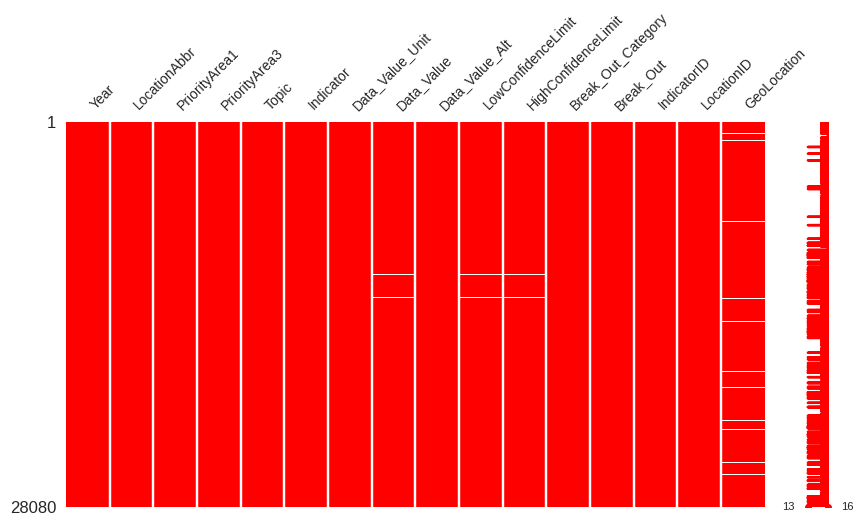

In [ ]:

# Visualize missing data
msno.matrix(heart_disease_data, sparkline=True, figsize=(10,5), fontsize=10, color=(1.0, 0.0, 0.0))
plt.show()


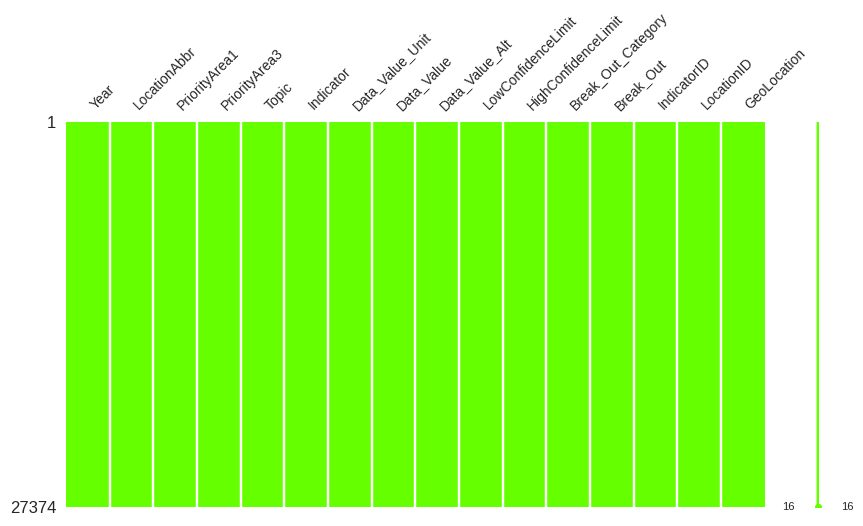

In [ ]:

# Drop rows with missing data
heart_disease_data = heart_disease_data.dropna(axis=0)
msno.matrix(heart_disease_data, sparkline=True, figsize=(10,5), fontsize=10, color=(0.4, 1.0, 0.0))
plt.show()


In [ ]:

# Separate GeoLocation column
heart_disease_data_GeoLocation = heart_disease_data['GeoLocation']
heart_disease_data = heart_disease_data.drop(['GeoLocation'], axis=1)
print(heart_disease_data.shape)
heart_disease_data.head()


(27374, 15)


,Year,LocationAbbr,PriorityArea1,PriorityArea3,Topic,Indicator,Data_Value_Unit,Data_Value,Data_Value_Alt,LowConfidenceLimit,HighConfidenceLimit,Break_Out_Category,Break_Out,IndicatorID,LocationID
6,2005,NY,Million Hearts,None,Stroke,Prevalence of cerebrovascular disease hospital...,Percent (%),3.0,3.0,2.9,3.0,Age,65+,MD601,36
7,2008,CT,Million Hearts,None,Stroke,Prevalence of cerebrovascular disease hospital...,Percent (%),3.6,3.6,3.5,3.7,Age,75+,MD601,9
8,2008,ME,Million Hearts,None,Stroke,Prevalence of cerebrovascular disease hospital...,Percent (%),6.0,6.0,3.7,8.3,Race,Other,MD601,23
9,2010,OH,Million Hearts,None,Stroke,Prevalence of cerebrovascular disease hospital...,Percent (%),3.7,3.7,3.7,3.8,Age,75+,MD601,39
10,2012,OH,Million Hearts,None,Stroke,Prevalence of cerebrovascular disease hospital...,Percent (%),4.1,4.1,4.0,4.1,Age,75+,MD601,39


In [ ]:

# Define target and features
target = heart_disease_data.Topic
features = heart_disease_data.drop(['Topic'], axis=1)
target.shape, features.shape

target.value_counts()


Major Cardiovascular Disease                  4586
Diseases of the Heart (Heart Disease)         4586
Coronary Heart Disease                        4569
Stroke                                        4554
Heart Failure                                 4551
Acute Myocardial Infarction (Heart Attack)    4528
Name: Topic, dtype: int64

# Train-test split 

In [ ]:
# Train-test split

kf = KFold(n_splits=20, shuffle=True, random_state=2304)
for tr_idx, te_idx in kf.split(features):
    X_train, X_test = features.iloc[tr_idx], features.iloc[te_idx]
    y_train, y_test = target.iloc[tr_idx], target.iloc[te_idx]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

X_train.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 26006 entries, 6 to 42639
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 26006 non-null  int64  
 1   LocationAbbr         26006 non-null  object 
 2   PriorityArea1        26006 non-null  object 
 3   PriorityArea3        26006 non-null  object 
 4   Indicator            26006 non-null  object 
 5   Data_Value_Unit      26006 non-null  object 
 6   Data_Value           26006 non-null  float64
 7   Data_Value_Alt       26006 non-null  float64
 8   LowConfidenceLimit   26006 non-null  float64
 9   HighConfidenceLimit  26006 non-null  float64
 10  Break_Out_Category   26006 non-null  object 
 11  Break_Out            26006 non-null  object 
 12  IndicatorID          26006 non-null  object 
 13  LocationID           26006 non-null  int64  
dtypes: float64(4), int64(2), object(8)
memory usage: 3.0+ MB


In [ ]:
# Label encoding

for C in ['LocationAbbr', 'PriorityArea1', 'PriorityArea3', 'Indicator', 'Data_Value_Unit',
          'Break_Out_Category', 'Break_Out', 'IndicatorID']:
    le = LabelEncoder()
    le.fit(X_train[C].fillna('NA'))

    X_train[C] = le.transform(X_train[C].fillna('NA'))
    X_test[C] = le.transform(X_test[C].fillna('NA'))

X_train.head()

y_train = le.fit_transform(y_train)
print(y_train)

y_test = le.fit_transform(y_test)
y_test



[5 5 5 ... 5 5 5]


array([4, 4, 4, ..., 5, 5, 5])

In [ ]:

# Model training and evaluation

model = XGBClassifier(n_estimators=40, random_state=2304, eval_metric='mlogloss')
model.fit(X_train, y_train)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

# Predict probabilities and labels
pred_proba = model.predict_proba(X_test)[:, 1]
pred_proba[:10]

pred_label = model.predict(X_test)
pred_label[400:500]

y_test[400:500]

classes = np.unique(y_train)
classes


1.0
1.0


array([0, 1, 2, 3, 4, 5])

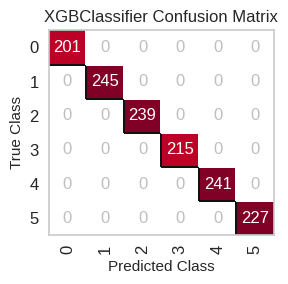

In [ ]:

# Confusion matrix

plt.figure(figsize=(3, 3))
confusion_matrix(model, X_train, y_train, X_test, y_test, classes=classes, color_map=plt.cm.Blues)
plt.show()



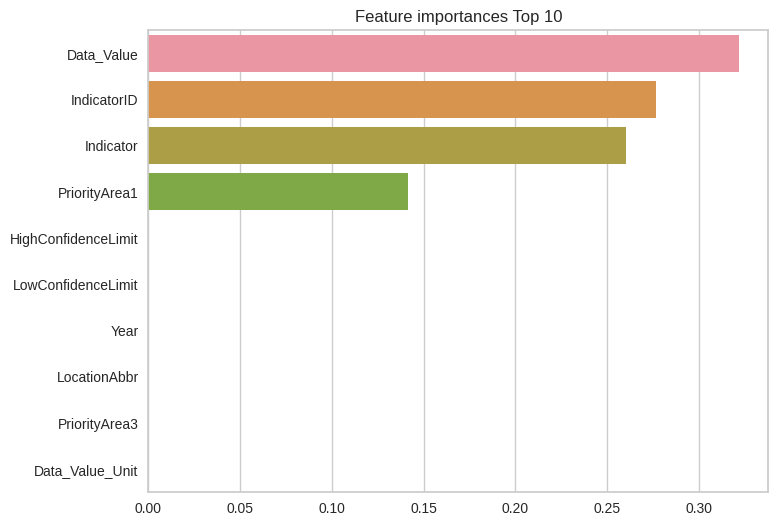

In [ ]:
# Feature importances

XGBClassifier_importances_values = model.feature_importances_

XGBClassifier_importances = pd.Series(XGBClassifier_importances_values, index=X_train.columns)

XGBClassifier_top10 = XGBClassifier_importances.sort_values(ascending=False)[:10]
plt.figure(figsize=(8, 6))
plt.title('Feature importances Top 10')
sns.barplot(x=XGBClassifier_top10, y=XGBClassifier_top10.index)
plt.show()

# Tests

In [ ]:
from scipy.stats import chi2_contingency, f_oneway, kruskal

# Perform chi-square tests to determine if there is a significant association
# between categorical variables (e.g., Break_Out_Category and Topic)

contingency_table = pd.crosstab(heart_disease_data['Break_Out_Category'], heart_disease_data['Topic'])
chi2, p_value, dof, ex = chi2_contingency(contingency_table)

print("Chi-square Test Results")
print("Chi2:", chi2)
print("p-value:", p_value)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:", ex)




Chi-square Test Results
Chi2: 0.7068369707280919
p-value: 0.99999997862793
Degrees of Freedom: 15
Expected Frequencies: [[1012.32410316 1021.49046541 1025.29115219 1017.46620881 1025.29115219
  1018.13691824]
 [1012.32410316 1021.49046541 1025.29115219 1017.46620881 1025.29115219
  1018.13691824]
 [ 506.16205158  510.7452327   512.64557609  508.73310441  512.64557609
   509.06845912]
 [1997.18974209 2015.27383649 2022.77211953 2007.33447797 2022.77211953
  2008.65770439]]


In [ ]:
## Tests to compare the means (ANOVA) or medians (Kruskal-Wallis) of the Data_Value variable
## across different categories or breakouts (e.g., comparing mean Data_Value for different Topics, Break_Out_Categories, or PriorityAreas)

# Group data by Topic
data_by_topic = heart_disease_data.groupby('Topic')['Data_Value']

# Collect the Data_Value values for each Topic
data_values = [data_by_topic.get_group(topic).values for topic in data_by_topic.groups]



In [ ]:
# Perform ANOVA test
f_stat, p_value_anova = f_oneway(*data_values)

print("ANOVA Test Results")
print("F-statistic:", f_stat)
print("p-value:", p_value_anova)


ANOVA Test Results
F-statistic: 84411.4969455222
p-value: 0.0


In [ ]:

# Perform Kruskal-Wallis test
h_stat, p_value_kruskal = kruskal(*data_values)

print("Kruskal-Wallis Test Results")
print("H-statistic:", h_stat)
print("p-value:", p_value_kruskal)


Kruskal-Wallis Test Results
H-statistic: 24027.5455063678
p-value: 0.0


In [ ]:

# Chi-square Test
contingency_table = pd.crosstab(heart_disease_data['Break_Out_Category'], heart_disease_data['Topic'])
chi2, p_value, dof, ex = chi2_contingency(contingency_table)

print("Chi-square Test Results")
print("Chi2:", chi2)
print("p-value:", p_value)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:", ex)


Chi-square Test Results
Chi2: 0.7068369707280919
p-value: 0.99999997862793
Degrees of Freedom: 15
Expected Frequencies: [[1012.32410316 1021.49046541 1025.29115219 1017.46620881 1025.29115219
  1018.13691824]
 [1012.32410316 1021.49046541 1025.29115219 1017.46620881 1025.29115219
  1018.13691824]
 [ 506.16205158  510.7452327   512.64557609  508.73310441  512.64557609
   509.06845912]
 [1997.18974209 2015.27383649 2022.77211953 2007.33447797 2022.77211953
  2008.65770439]]


In [ ]:

# ANOVA and Kruskal-Wallis Test
data_by_topic = heart_disease_data.groupby('Topic')['Data_Value']
data_values = [data_by_topic.get_group(topic).values for topic in data_by_topic.groups]

f_stat, p_value_anova = f_oneway(*data_values)
print("ANOVA Test Results")
print("F-statistic:", f_stat)
print("p-value:", p_value_anova)

h_stat, p_value_kruskal = kruskal(*data_values)
print("Kruskal-Wallis Test Results")
print("H-statistic:", h_stat)
print("p-value:", p_value_kruskal)

ANOVA Test Results
F-statistic: 84411.4969455222
p-value: 0.0
Kruskal-Wallis Test Results
H-statistic: 24027.5455063678
p-value: 0.0
